### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/polimi/artificialneuraldeep

/gdrive/My Drive/polimi/artificialneuraldeep


### Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.0


In [4]:
# Download and import visualkeras library
!pip install visualkeras
import visualkeras

     |████████████████████████████████| 795 kB 4.1 MB/s 


### Set seed for reproducibility

In [5]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

## CIFAR-10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Class labels:

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

In [6]:
# Download the data
(X_train_val, y_train_val), (X_test, y_test) = tfk.datasets.cifar10.load_data()
labels = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
X_train_val.shape, y_train_val.shape, X_test.shape, y_test.shape

170508288/170498071 [==============================] - 11s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

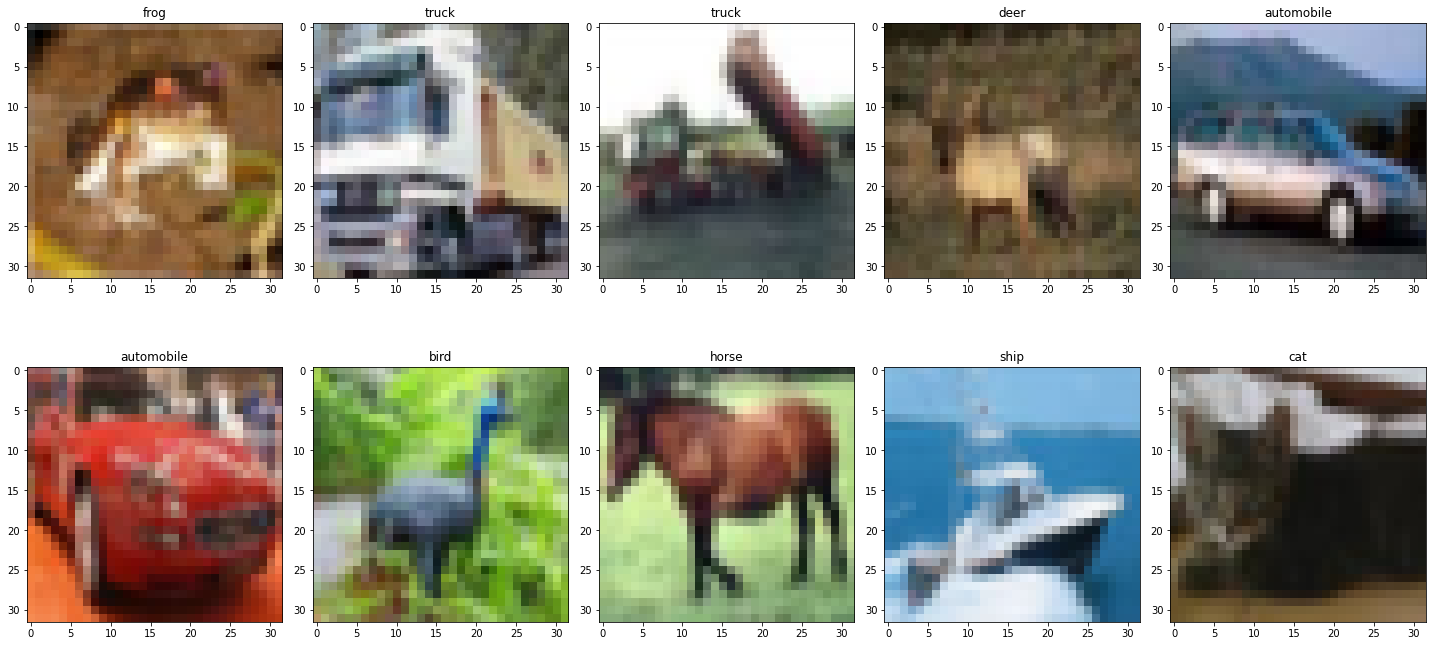

In [7]:
# Inspect the data
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_row,2*num_col))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train_val[i])
    ax.set_title('{}'.format(labels[y_train_val[i][0]]))
plt.tight_layout()
plt.show()

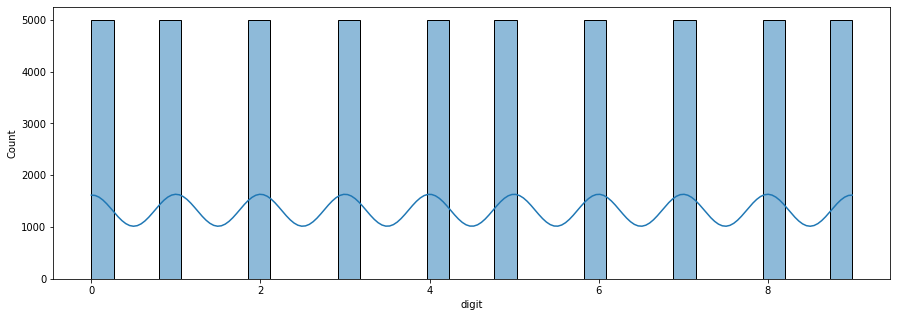

In [8]:
# Inspect the target
plt.figure(figsize=(15,5))
sns.histplot(data=pd.DataFrame(y_train_val, columns=['digit']), x='digit', kde=True)
plt.show()

### Process data

In [9]:
# Normalize data
X_train_val=X_train_val/255.
X_test=X_test/255.

# Convert the label to categorical
#ejemplo 3 clases --> one hot (1) ---> array de 0 y un uno [0,1,0] si fuesen 10 clases lo mismo pero con 10
y_train=tfk.utils.to_categorical(y_train_val)
y_test=tfk.utils.to_categorical(y_test)

In [12]:
np.argmax(y_train_val[0])

0

In [13]:
# Split in train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=seed, test_size=.1, stratify=y_train_val)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((45000, 32, 32, 3), (45000, 1), (5000, 32, 32, 3), (5000, 1))

In [ ]:
# Compare categorical and "default" labels


### Models metadata

In [14]:
input_shape = X_train.shape[1:]
batch_size = 128
epochs = 200
input_shape

(32, 32, 3)

### CNN model

In [ ]:
def build_model(input_shape):

    # Build the neural network layer by layer
    input_layer = 

    output_layer = 

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_model(input_shape)
model.summary()
visualkeras.layered_view(model, legend=True, spacing=20, scale_xy=10)

In [ ]:
# Train the model


In [ ]:
# Plot the training
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

In [ ]:
# Load pretrained model


In [ ]:
# Predict the test set with the CNN


In [ ]:
# Plot the target images and the predictions


# Classification metrics
## Binary classification

![](https://miro.medium.com/max/1400/1*PPgItHcPSaskyjLMWFC-Kw.png
)

##$Accuracy$ = $\frac{TP+TN}{TP+FP+TN+FN}$

##$Precision$ = $\frac{TP}{TP+FP}$

##$Recall$ = $\frac{TP}{TP+FN}$

##$F1$ = $2\frac{precision \cdot recall}{precision+recall}$

## Categorical classification (Macro averaging)

![](https://www.researchgate.net/profile/Frank-Krueger-2/publication/314116591/figure/fig7/AS:614085901185031@1523420896093/Confusion-matrix-for-multi-class-classification-The-confusion-matrix-of-a_W640.jpg)

##$Accuracy$ = $\frac{diag(CM)}{sum(CM)}$

##$Precision_k$ = $\frac{TP_k}{TP_k+FP_k}$

##$Precision$ = $\frac{\sum_k^n precision_k}{n}$

##$Recall_k$ = $\frac{TP_k}{TP_k+FN_k}$

##$Recall$ = $\frac{\sum_k^n recall_k}{n}$

##$F1$ = $2\frac{precision \cdot recall}{precision+recall}$

In [ ]:
# Compute the confusion matrix

# Compute the classification metrics

# Plot the confusion matrix


What about "deep" learning?

In [ ]:
# Download and plot the VGG16 Net
vgg = tfk.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)
visualkeras.layered_view(vgg, legend=True, spacing=20, scale_xy=5)

In [ ]:
# Download and plot the InceptionV3 Net
inception = tfk.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
tfk.utils.plot_model(inception)